In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [8]:
# Load your dataset (replace with your file path)
df = pd.read_csv('AAPL_5yr_stock_data.csv')


In [9]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [10]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

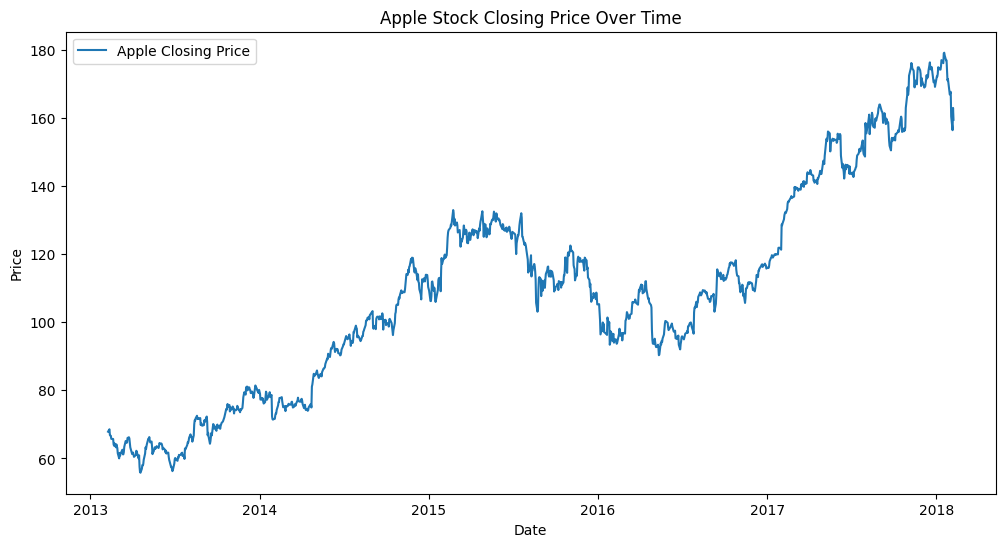

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['close'], label='Apple Closing Price')
plt.title('Apple Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
# Use only 'Close' price
data = df.filter(['close'])
dataset = data.values  # Convert to numpy array

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [15]:
# Training data length
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Create the training dataset
train_data = scaled_data[0:training_data_len, :]

# Create the datasets: x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # 60 previous prices
    y_train.append(train_data[i, 0])       # 61st price

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape to 3D format [samples, time steps, features] as expected by LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\abhis\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0547
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.0535e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.7339e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.1188e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.7839e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.8945e-04
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.6609e-04
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.6546e-04
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.4625e-04
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.1235e-04
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.3074e-04
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.6854e-04
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.1315e-04
Epoch 15/20
30/30 ━━━━━

In [18]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert to numpy array
x_test = np.array(x_test)

# Reshape for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Unscale to original values

# Calculate RMSE (root mean squared error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Root Mean Squared Error: 4.604077832616642


C:\Users\abhis\AppData\Local\Temp\ipykernel_21540\2922521565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


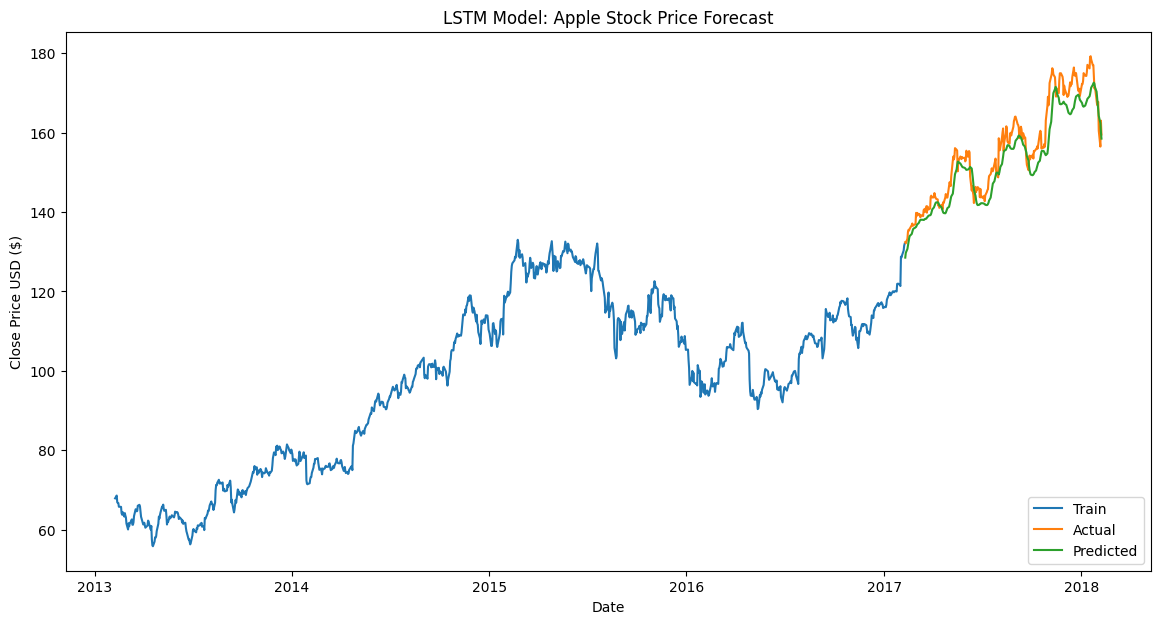

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the result
plt.figure(figsize=(14,7))
plt.title('LSTM Model: Apple Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()